In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.metrics import confusion_matrix
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, accuracy_score, roc_auc_score

In [39]:
base = pd.read_csv('/content/drive/MyDrive/ticdata2000.txt', names=['MOSTYPE','MAANTHUI','MGEMOMV','MGEMLEEF','MOSHOOFD','MGODRK','MGODPR','MGODOV','MGODGE','MRELGE','MRELSA','MRELOV','MFALLEEN','MFGEKIND','MFWEKIND','MOPLHOOG','MOPLMIDD','MOPLLAAG','MBERHOOG','MBERZELF','MBERBOER','MBERMIDD','MBERARBG','MBERARBO','MSKA','MSKB1','MSKB2','MSKC','MSKD','MHHUUR','MHKOOP','MAUT1','MAUT2','MAUT0','MZFONDS','MZPART','MINKM30','MINK3045','MINK4575','MINK7512','MINK123M','MINKGEM','MKOOPKLA','PWAPART','PWABEDR','PWALAND','PPERSAUT','PBESAUT','PMOTSCO','PVRAAUT','PAANHANG','PTRACTOR','PWERKT','PBROM','PLEVEN','PPERSONG','PGEZONG','PWAOREG','PBRAND','PZEILPL','PPLEZIER','PFIETS','PINBOED','PBYSTAND','AWAPART','AWABEDR','AWALAND','APERSAUT','ABESAUT','AMOTSCO','AVRAAUT','AAANHANG','ATRACTOR','AWERKT','ABROM','ALEVEN','APERSONG','AGEZONG','AWAOREG','ABRAND','AZEILPL','APLEZIER','AFIETS','AINBOED','ABYSTAND','CARAVAN'], header=None,sep="\s+")
base_validation = pd.read_csv('/content/drive/MyDrive/ticeval2000.txt', names=['MOSTYPE','MAANTHUI','MGEMOMV','MGEMLEEF','MOSHOOFD','MGODRK','MGODPR','MGODOV','MGODGE','MRELGE','MRELSA','MRELOV','MFALLEEN','MFGEKIND','MFWEKIND','MOPLHOOG','MOPLMIDD','MOPLLAAG','MBERHOOG','MBERZELF','MBERBOER','MBERMIDD','MBERARBG','MBERARBO','MSKA','MSKB1','MSKB2','MSKC','MSKD','MHHUUR','MHKOOP','MAUT1','MAUT2','MAUT0','MZFONDS','MZPART','MINKM30','MINK3045','MINK4575','MINK7512','MINK123M','MINKGEM','MKOOPKLA','PWAPART','PWABEDR','PWALAND','PPERSAUT','PBESAUT','PMOTSCO','PVRAAUT','PAANHANG','PTRACTOR','PWERKT','PBROM','PLEVEN','PPERSONG','PGEZONG','PWAOREG','PBRAND','PZEILPL','PPLEZIER','PFIETS','PINBOED','PBYSTAND','AWAPART','AWABEDR','AWALAND','APERSAUT','ABESAUT','AMOTSCO','AVRAAUT','AAANHANG','ATRACTOR','AWERKT','ABROM','ALEVEN','APERSONG','AGEZONG','AWAOREG','ABRAND','AZEILPL','APLEZIER','AFIETS','AINBOED','ABYSTAND'], header=None,sep="\s+")
tgs_validation = pd.read_csv('/content/drive/MyDrive/tictgts2000.txt', names=['CARAVAN'], header=None,sep="\s+")

In [3]:
base.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0


In [4]:
base.describe()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,...,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000
mean,24.253349,1.110615,2.678805,2.991240,5.773617,0.696496,4.626932,1.069907,3.258502,6.183442,...,0.005325,0.006527,0.004638,0.570079,0.000515,0.006012,0.031776,0.007901,0.014256,0.059773
std,12.846706,0.405842,0.789835,0.814589,2.856760,1.003234,1.715843,1.017503,1.597647,1.909482,...,0.072782,0.080532,0.077403,0.562058,0.022696,0.081632,0.210986,0.090463,0.119996,0.237087
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,1.000000,3.000000,3.000000,7.000000,0.000000,5.000000,1.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.000000,1.000000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,7.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,41.000000,10.000000,5.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,9.000000,...,1.000000,1.000000,2.000000,7.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000


ANALISE EXPLORATORIA

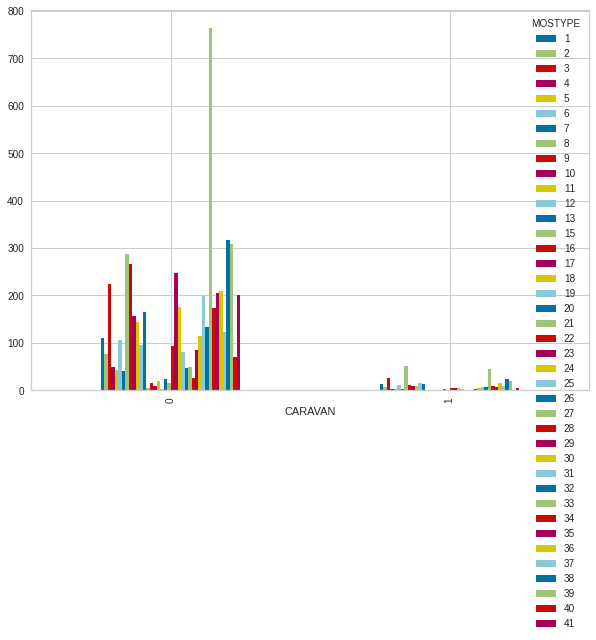

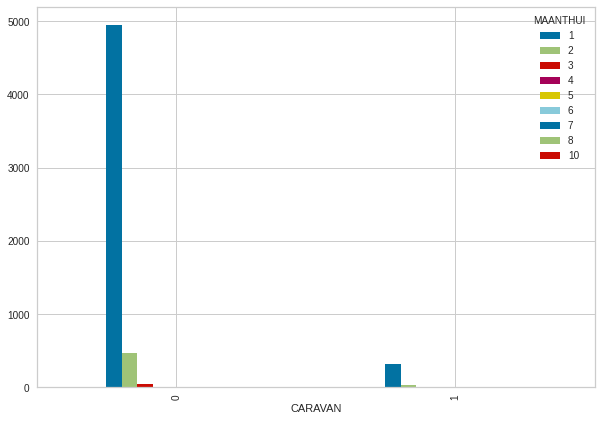

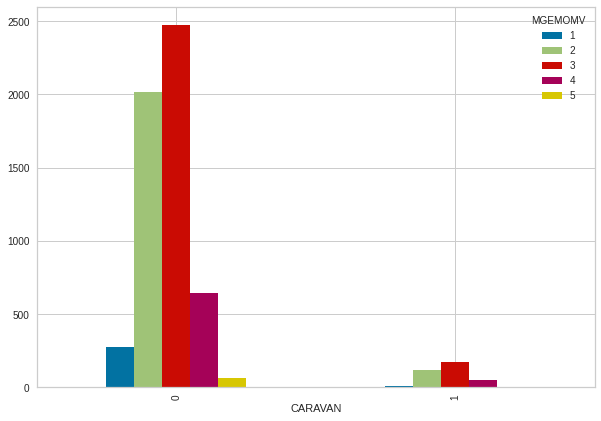

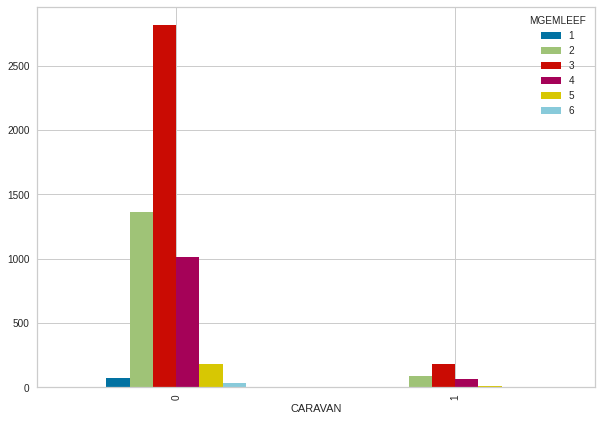

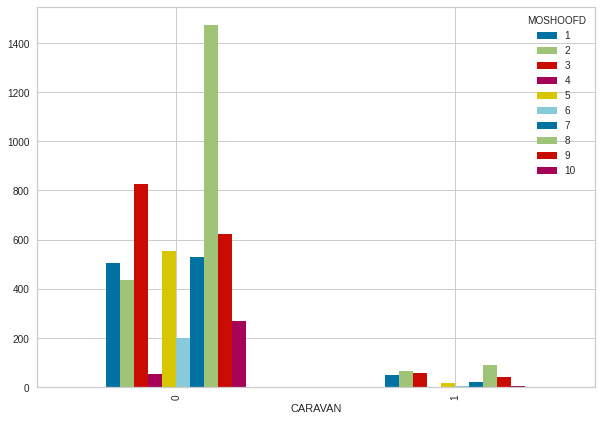

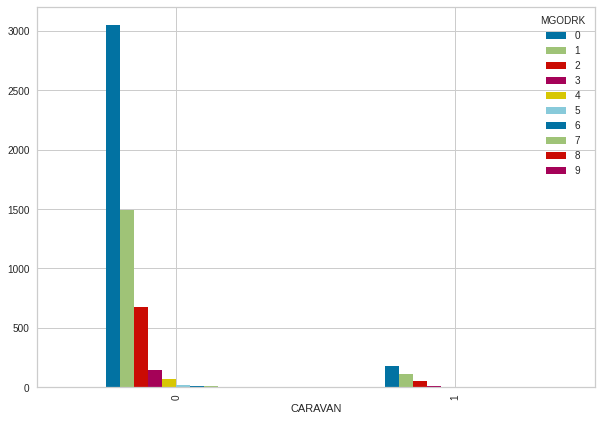

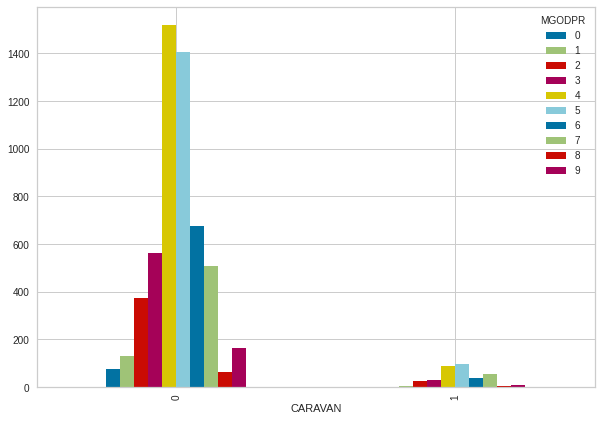

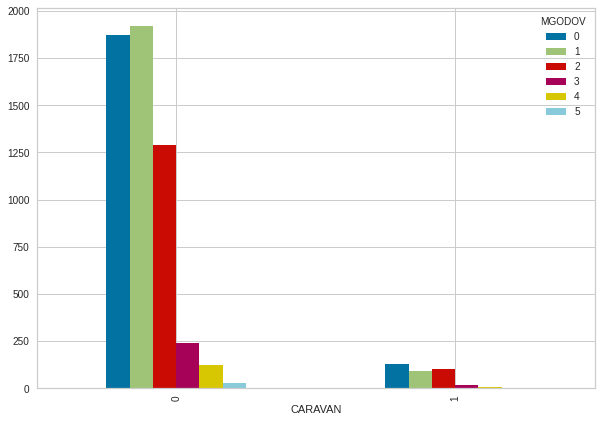

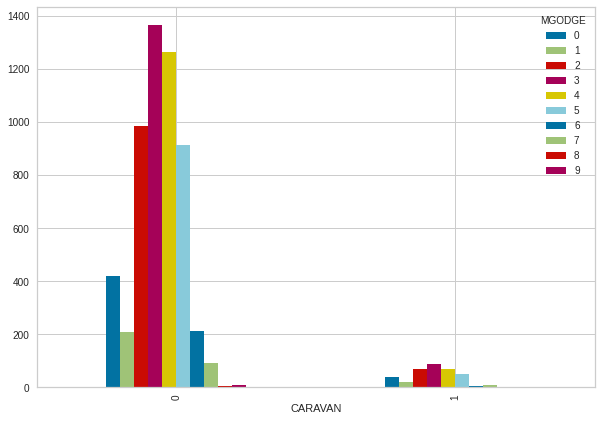

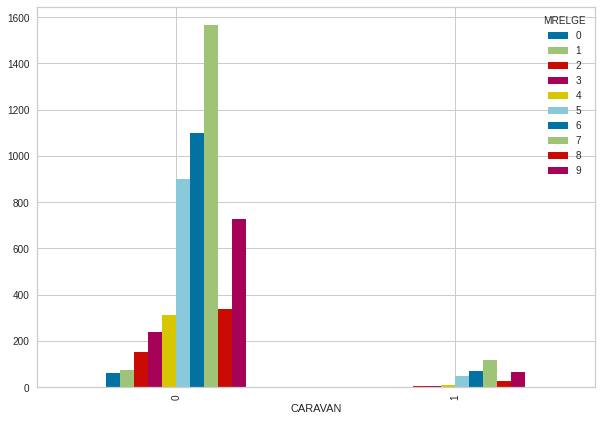

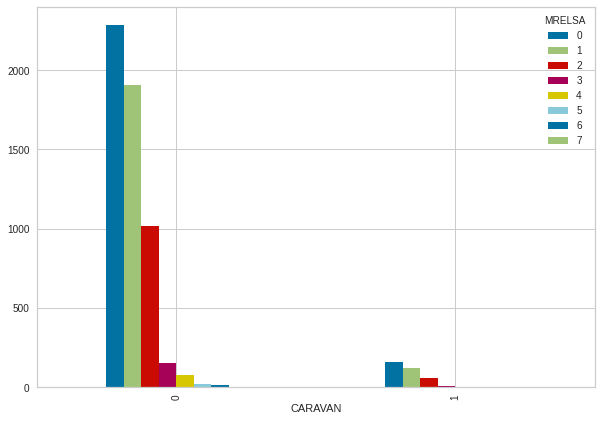

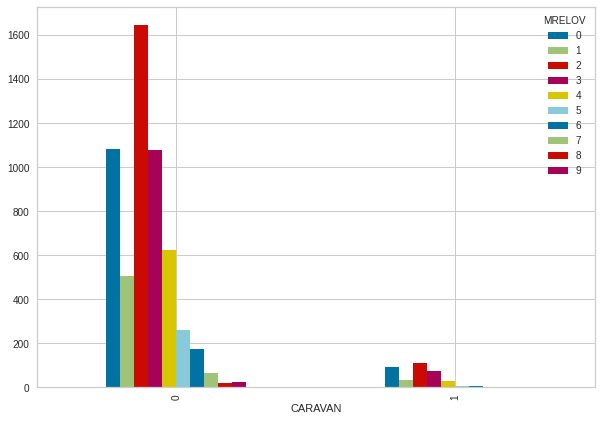

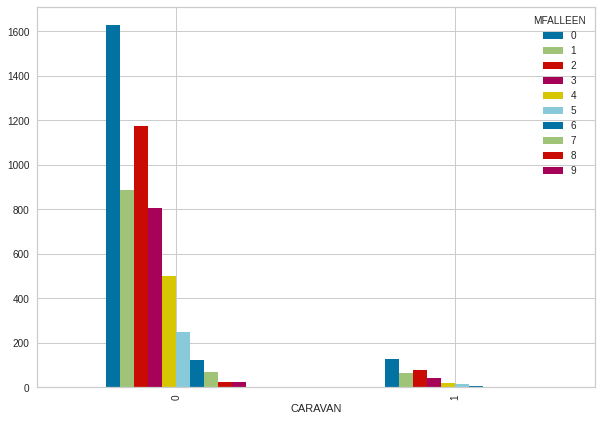

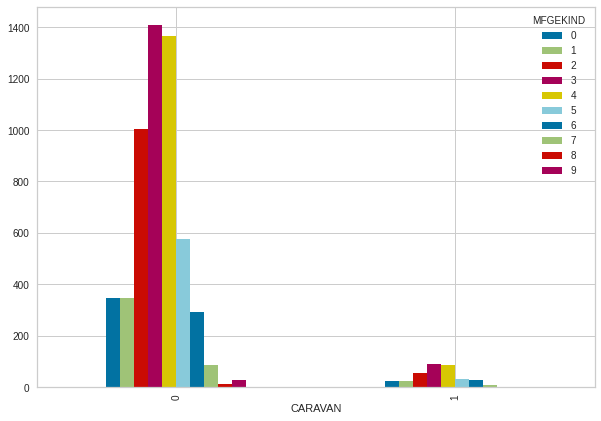

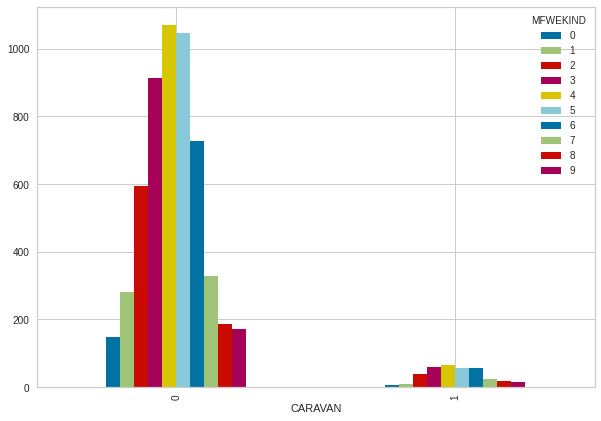

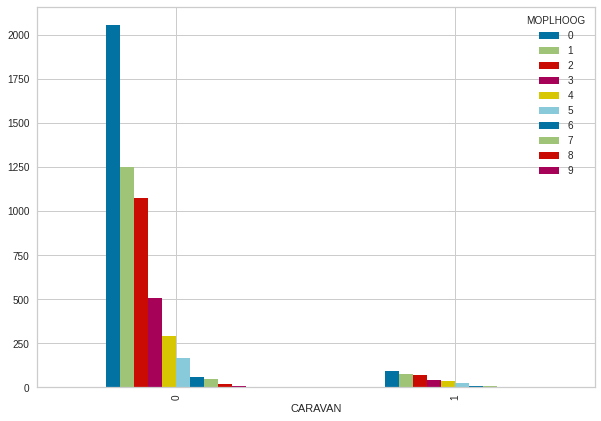

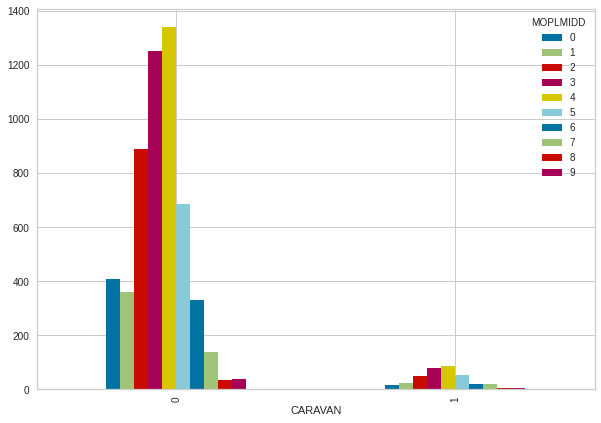

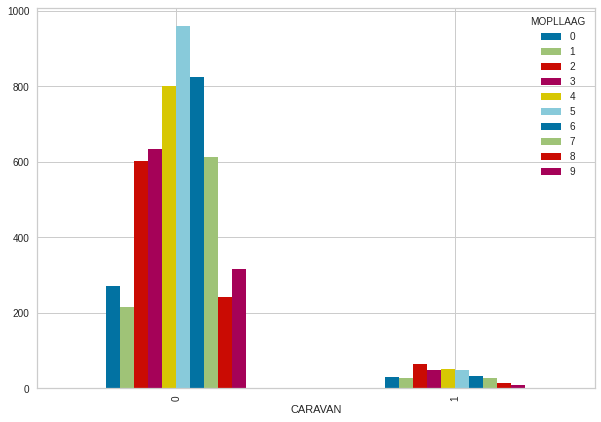

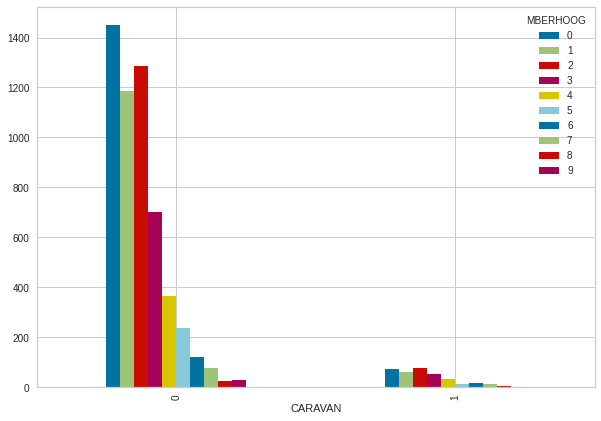

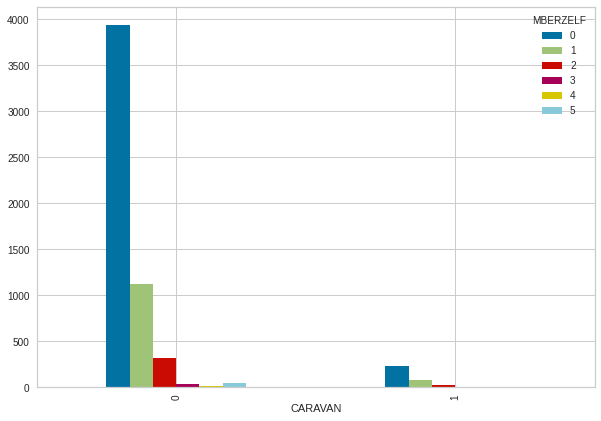

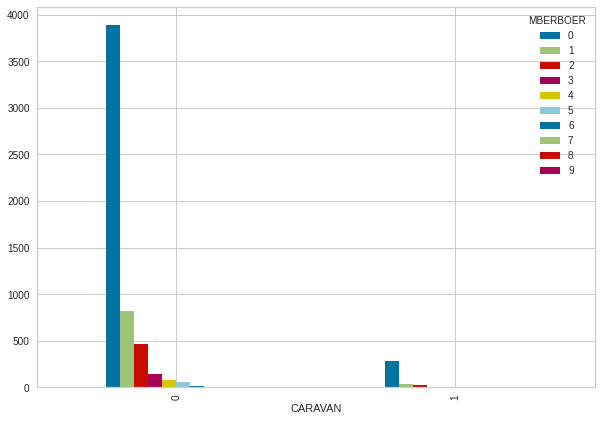

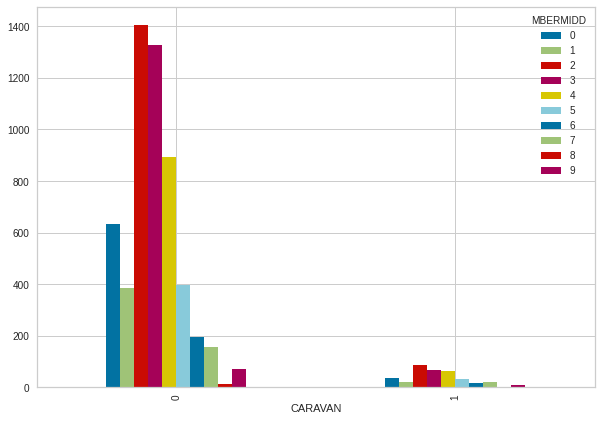

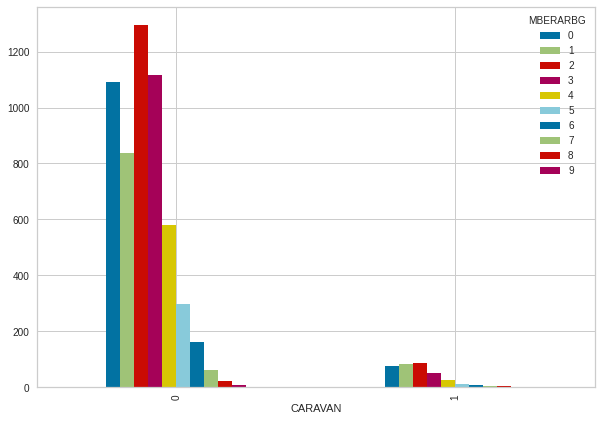

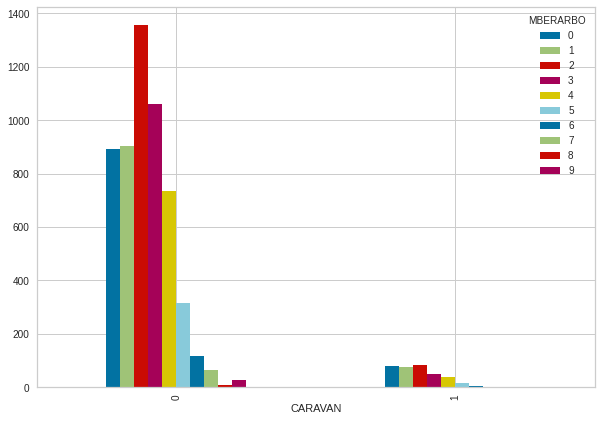

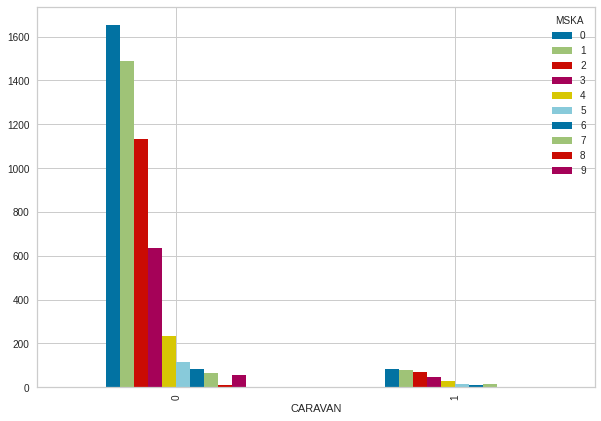

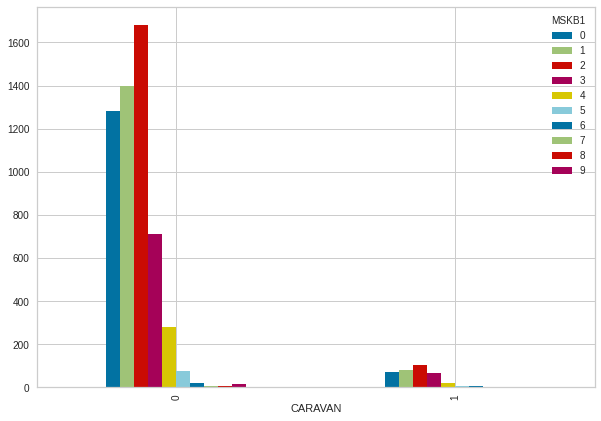

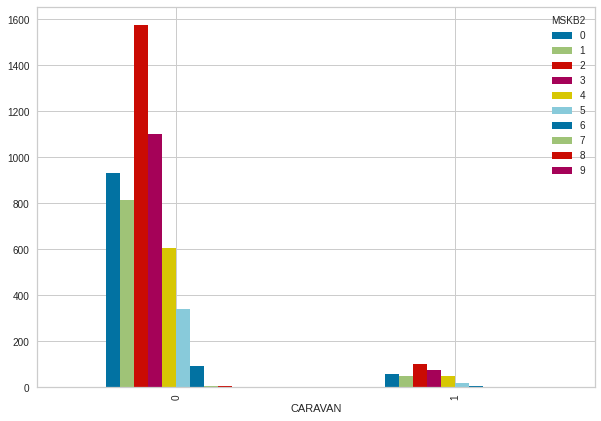

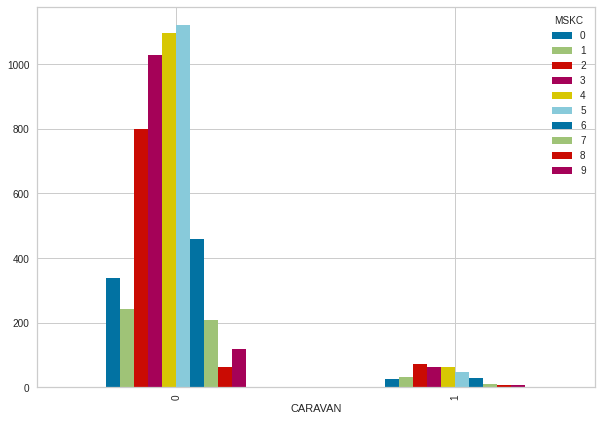

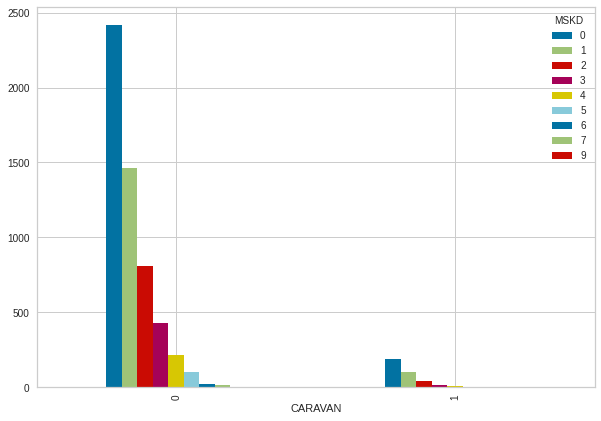

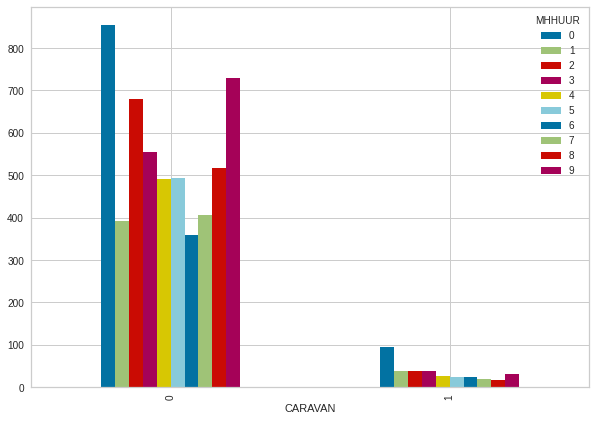

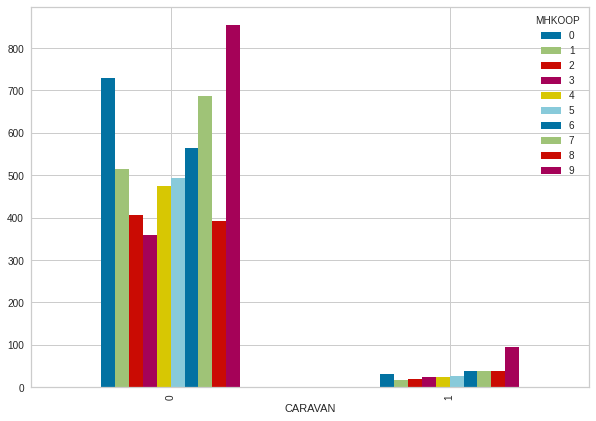

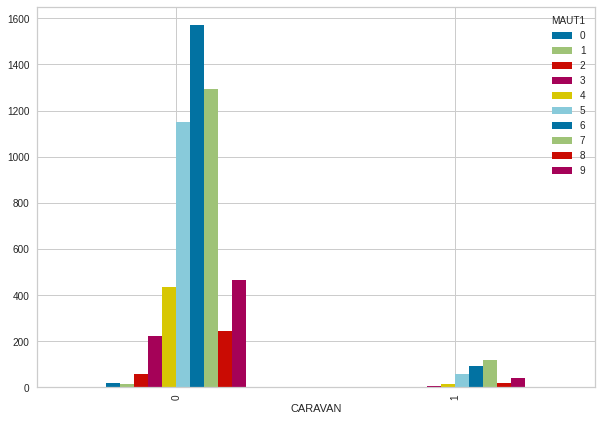

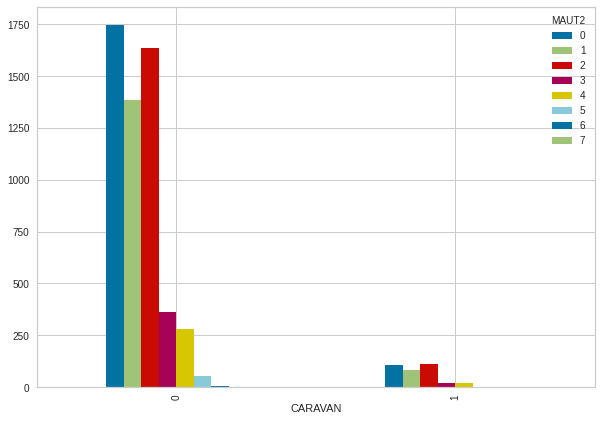

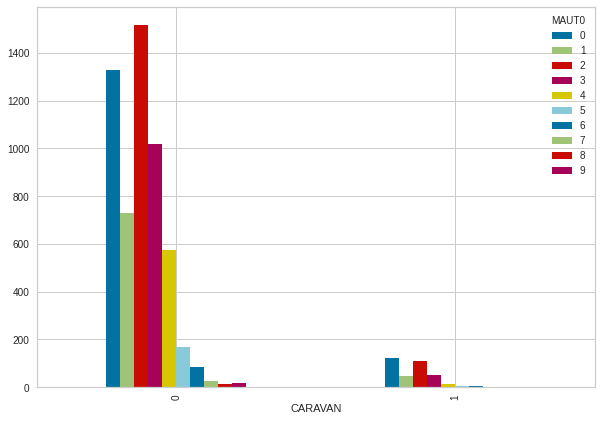

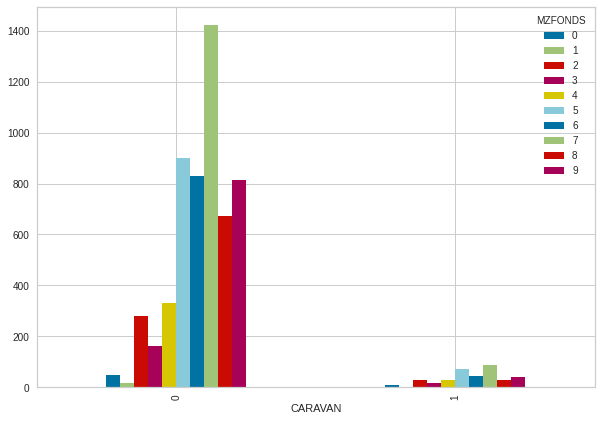

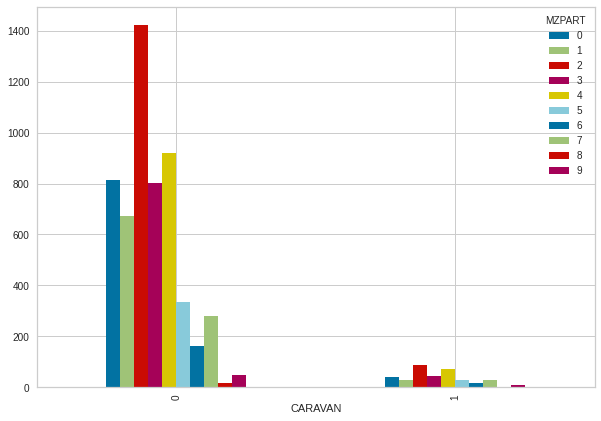

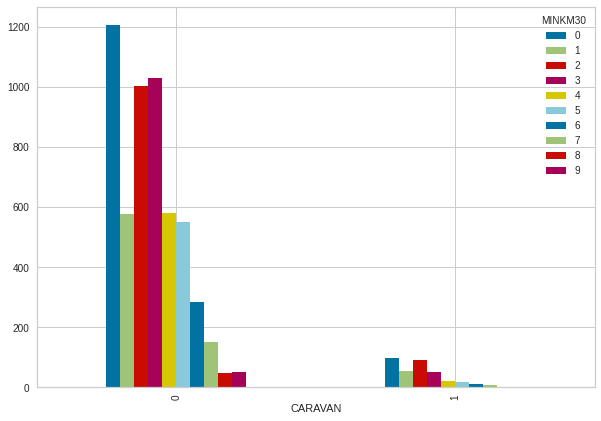

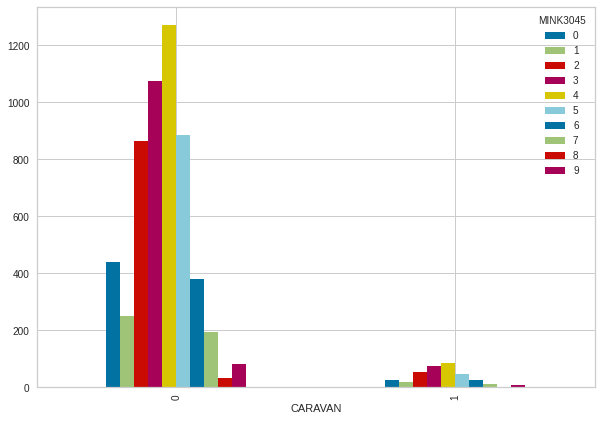

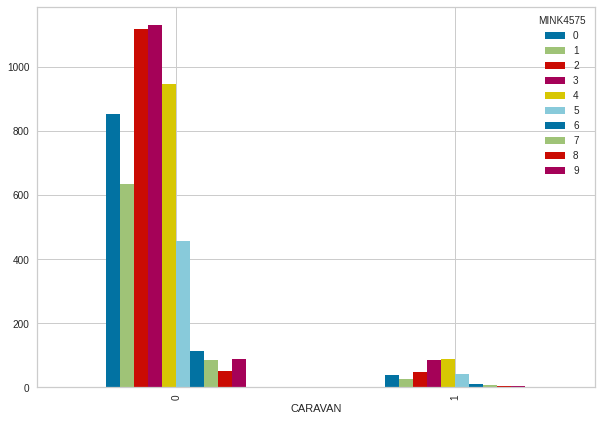

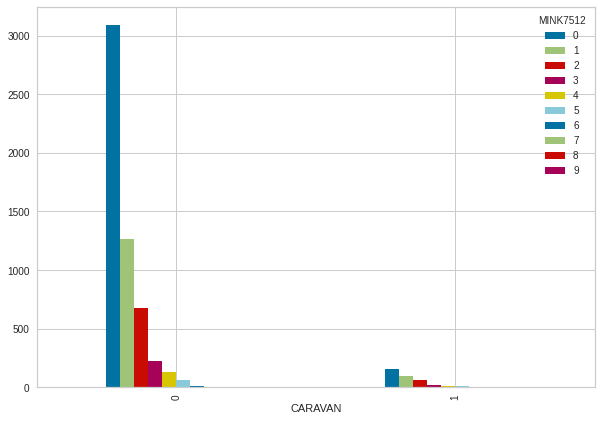

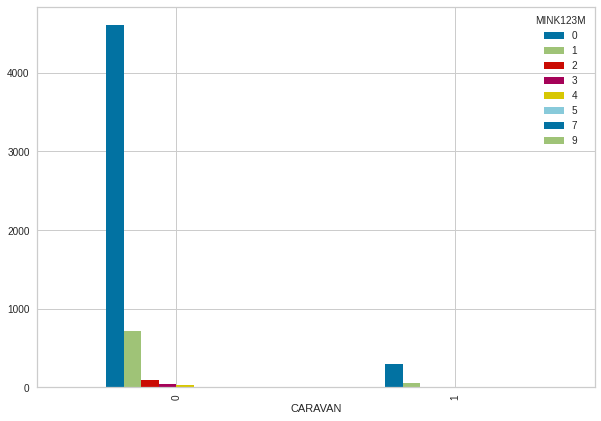

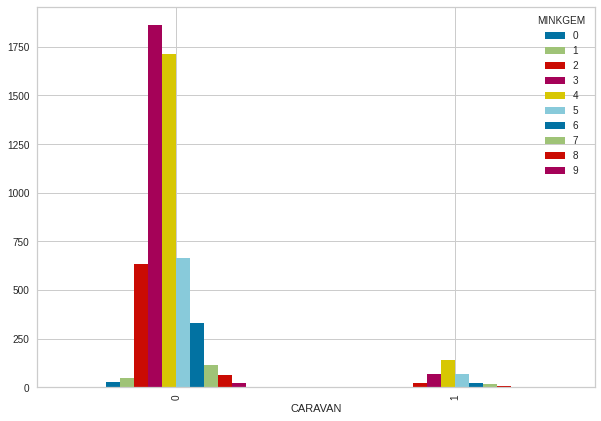

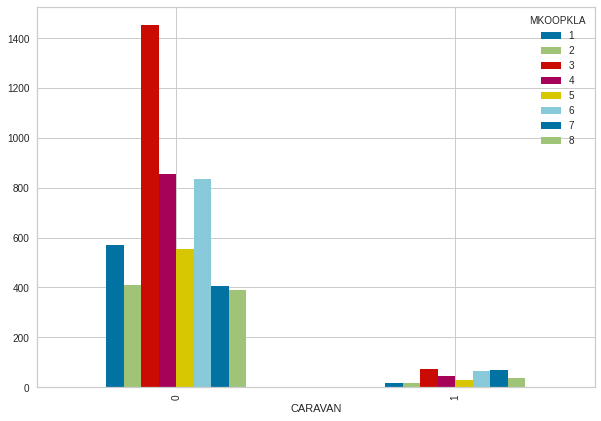

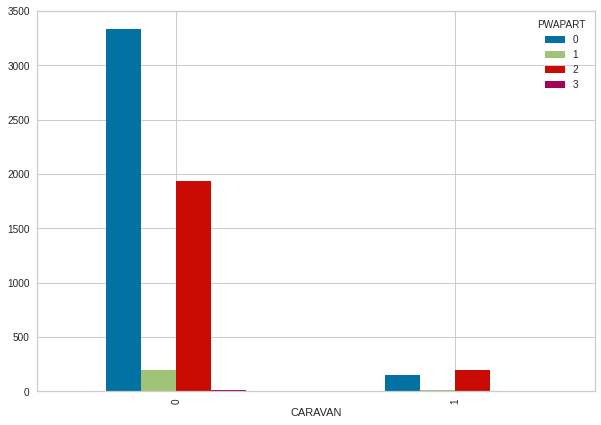

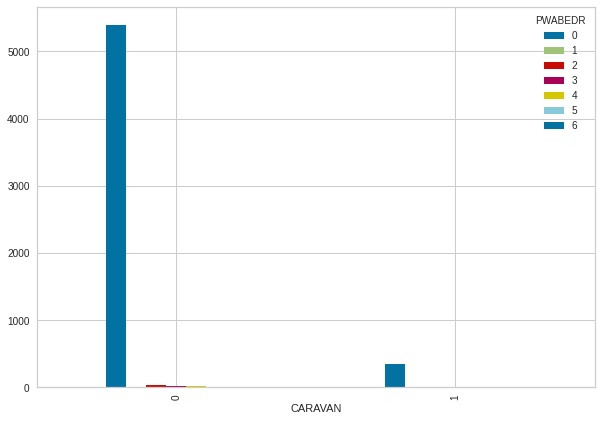

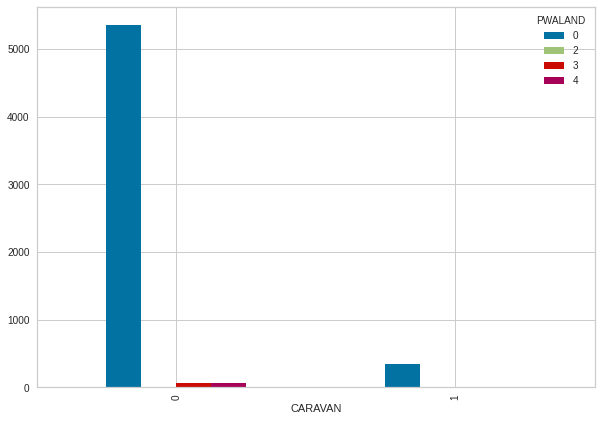

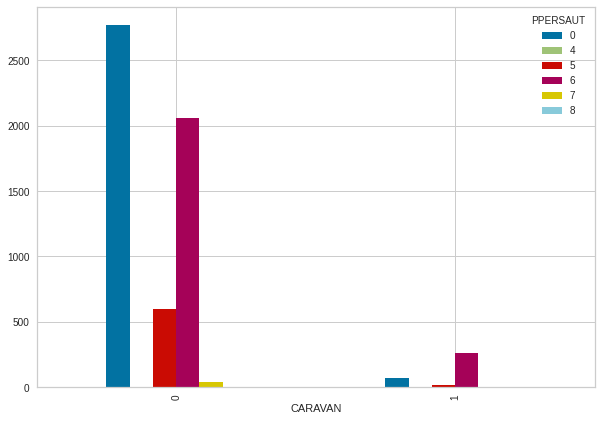

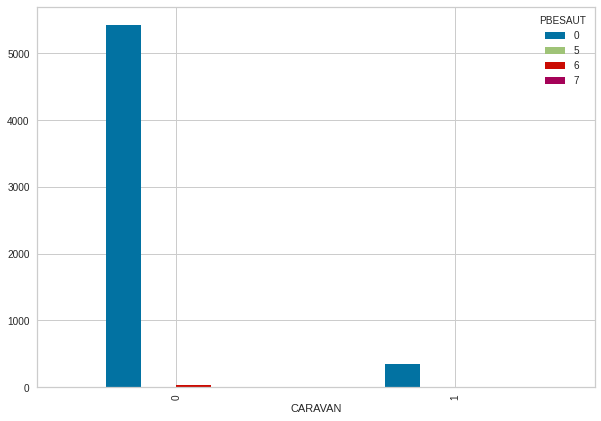

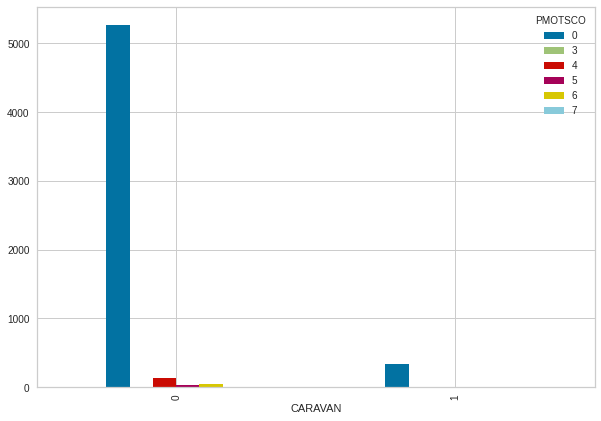

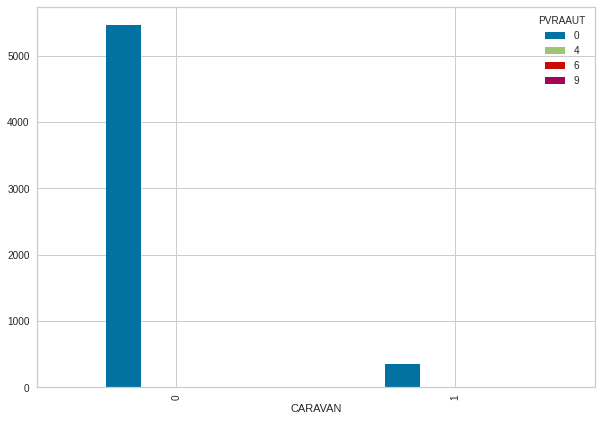

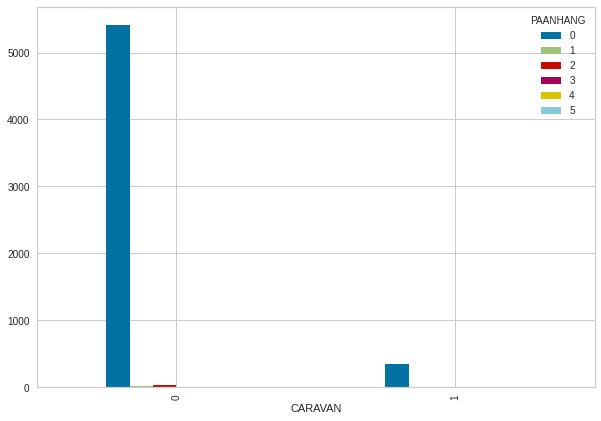

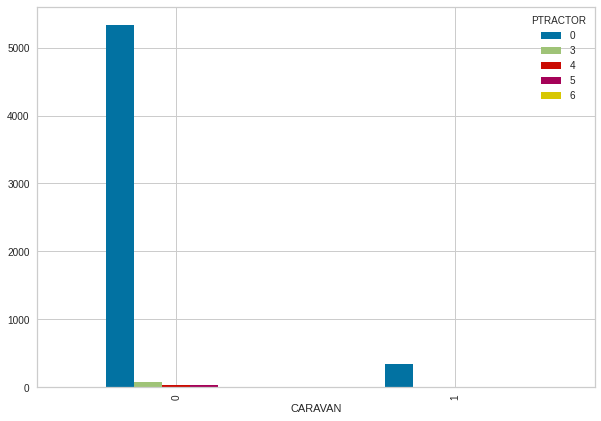

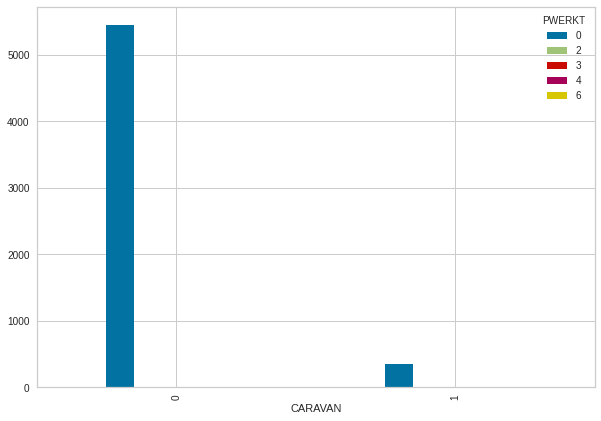

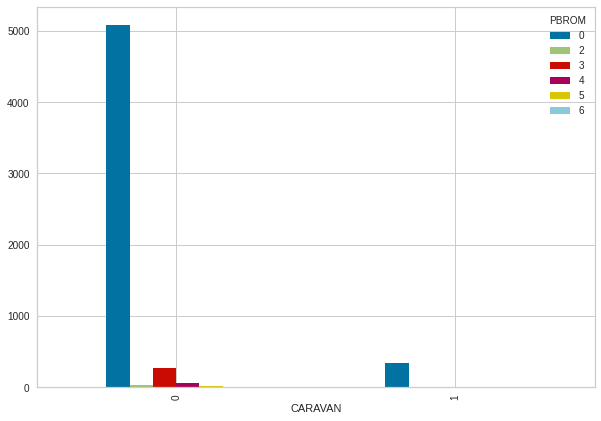

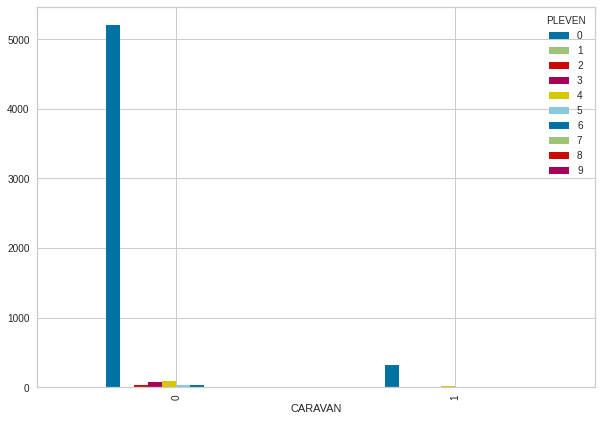

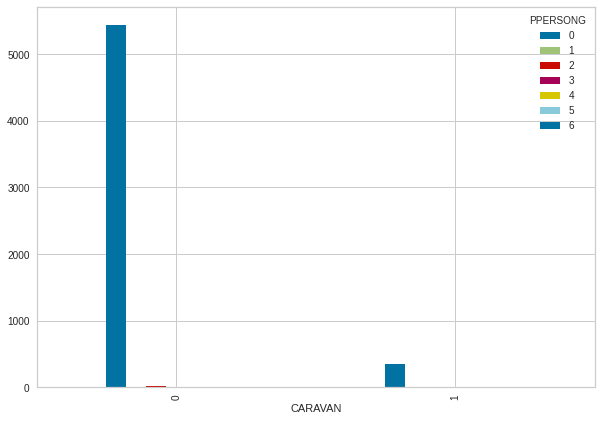

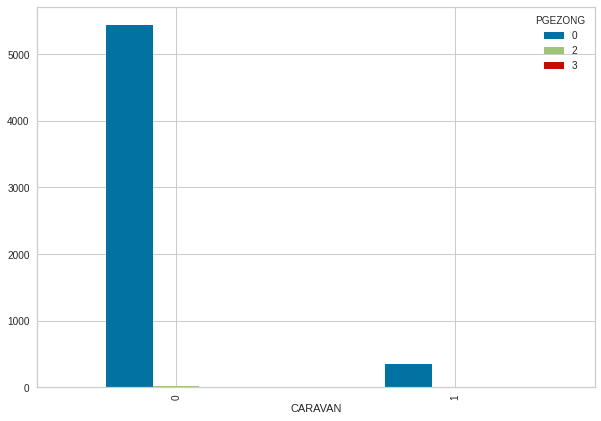

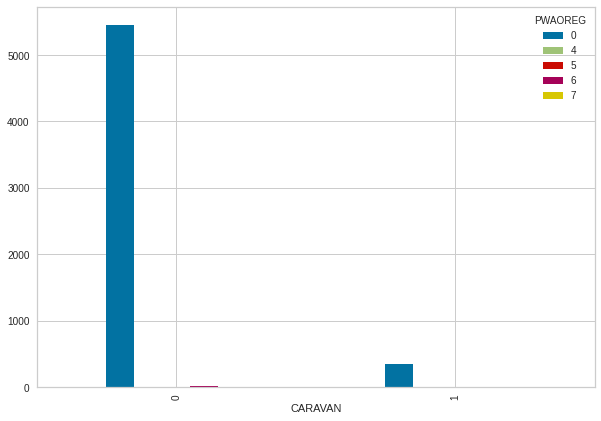

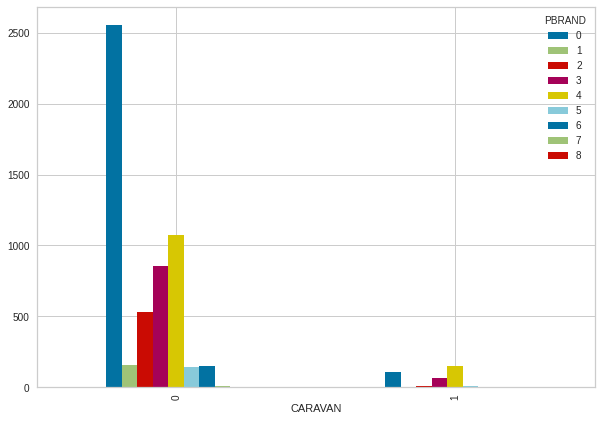

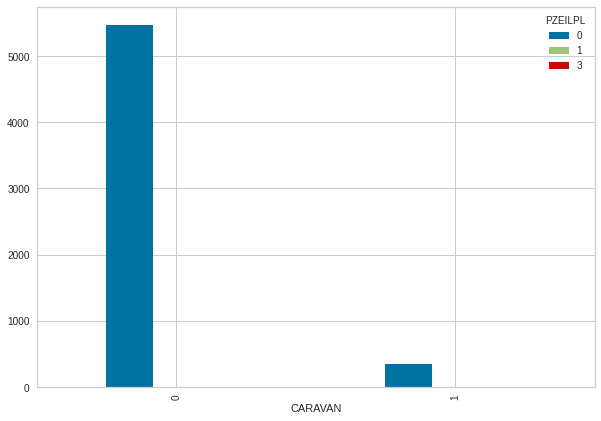

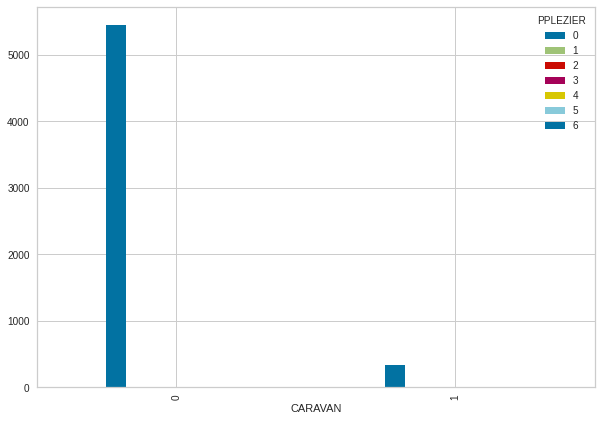

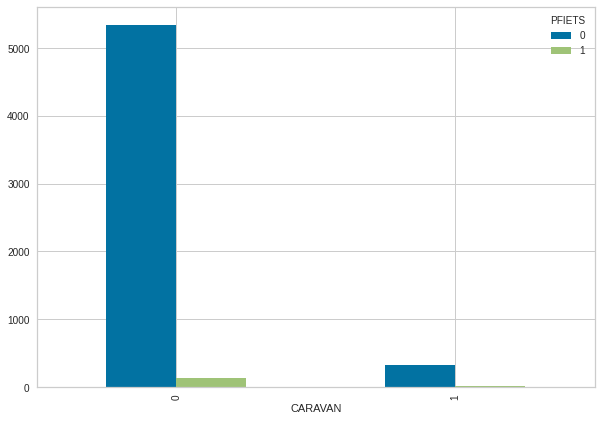

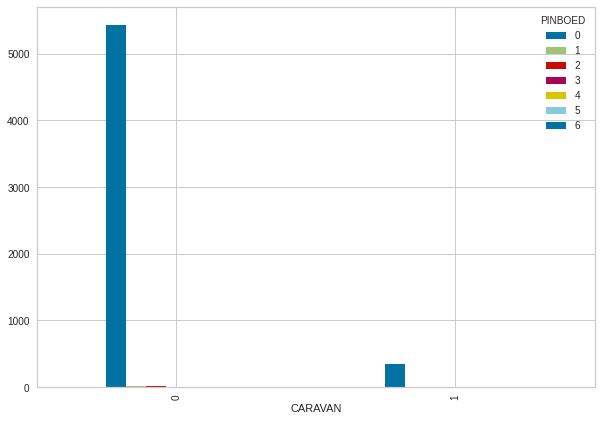

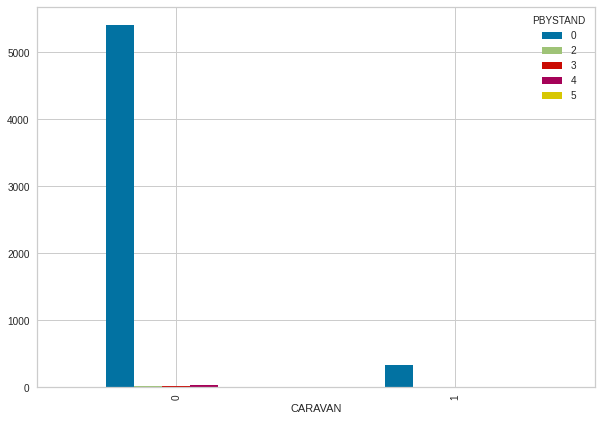

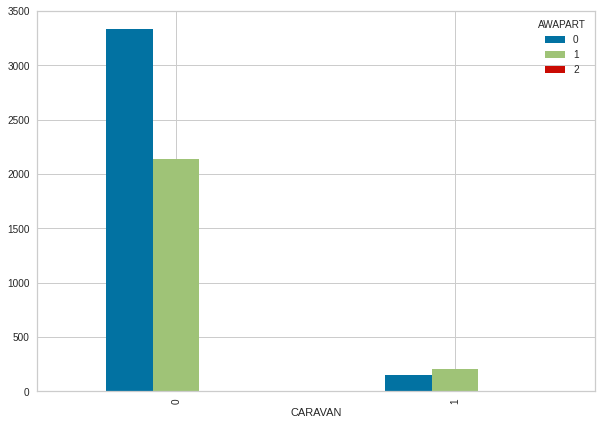

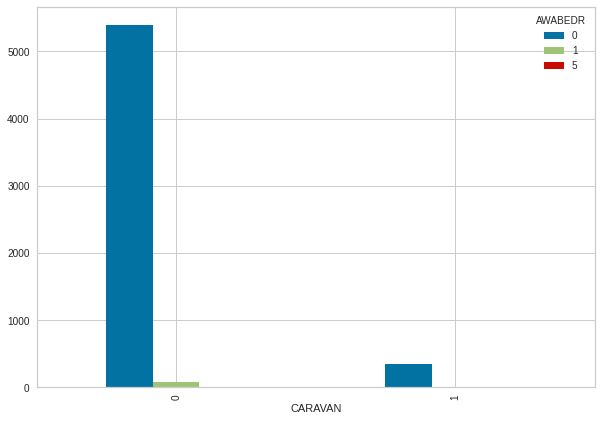

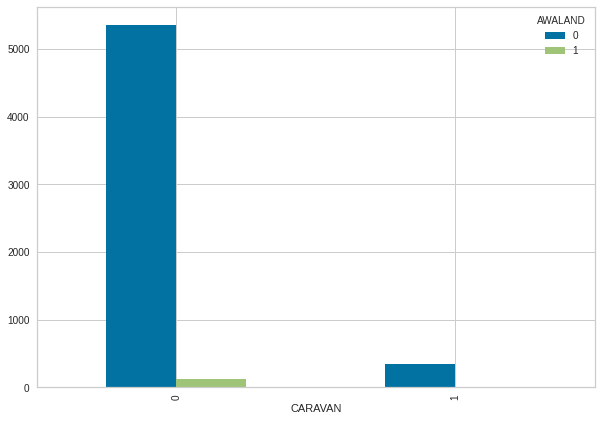

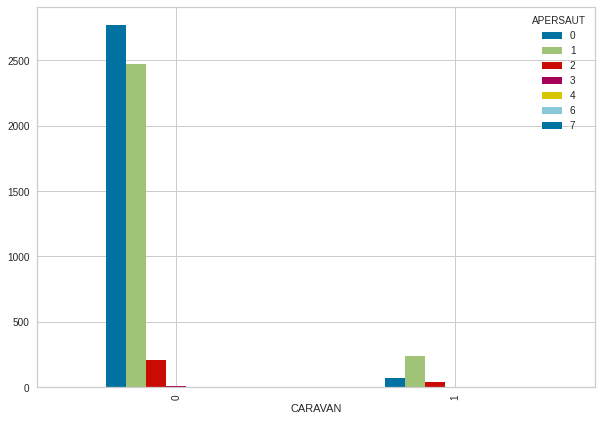

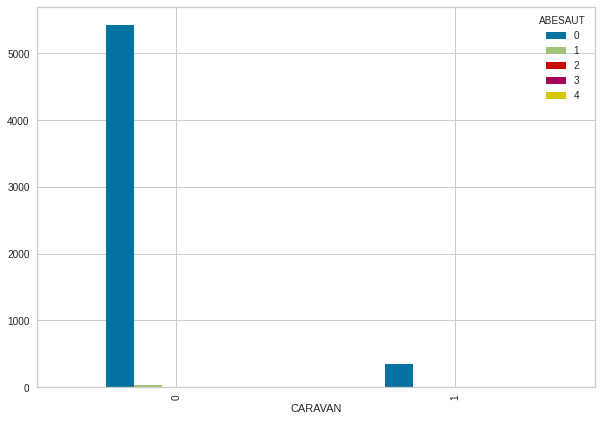

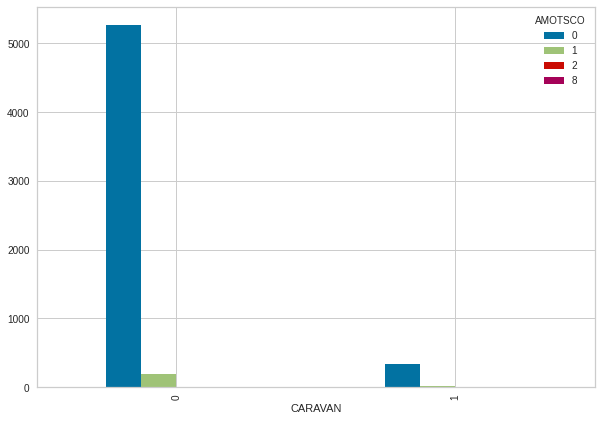

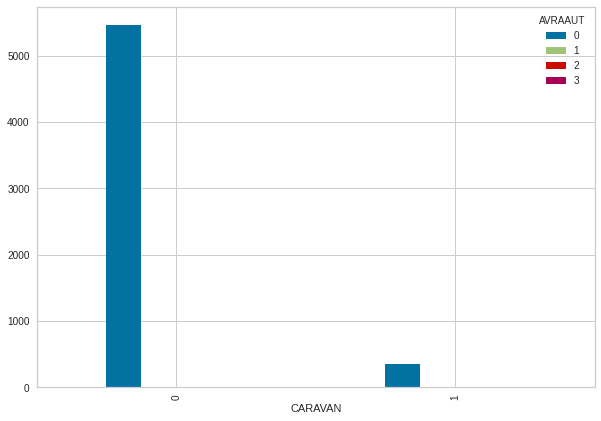

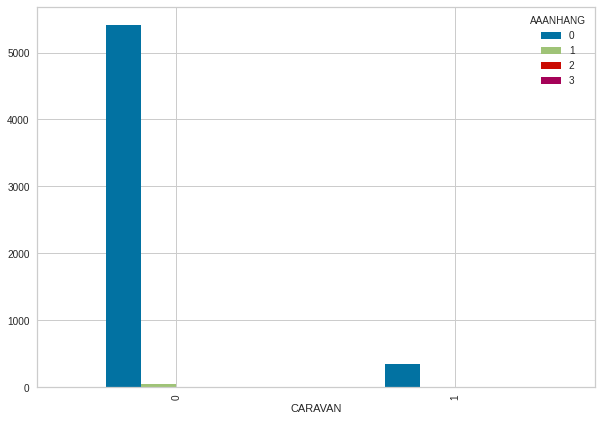

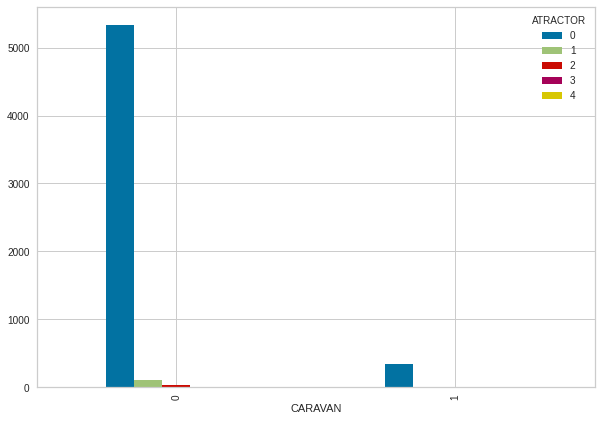

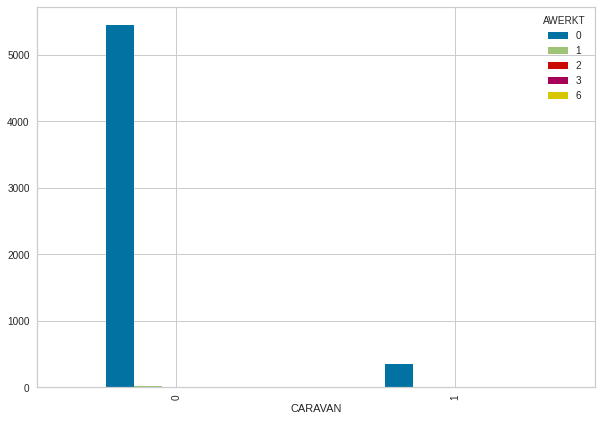

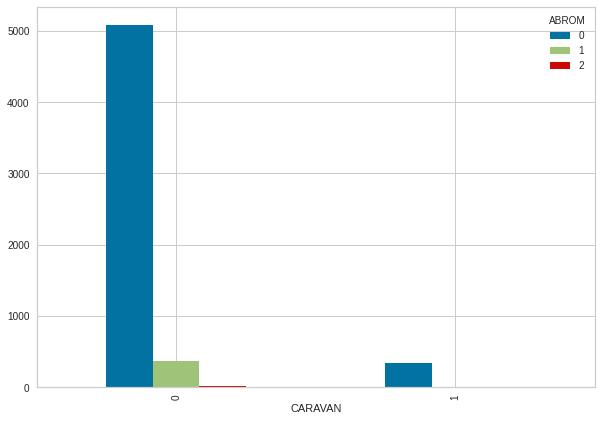

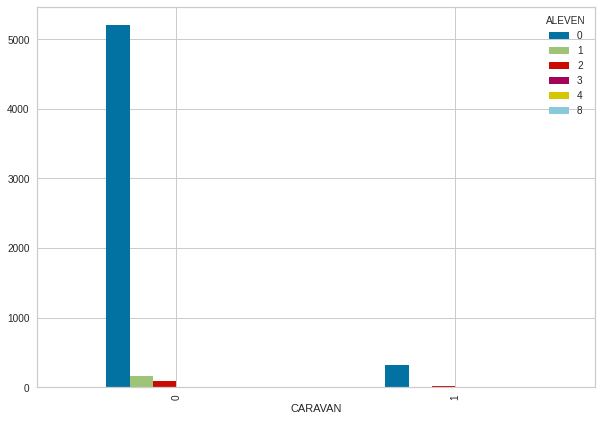

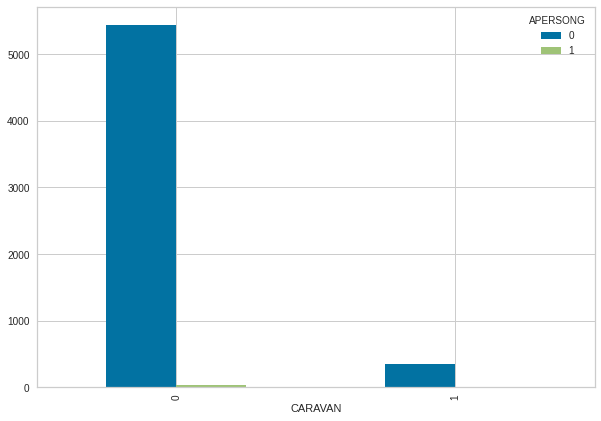

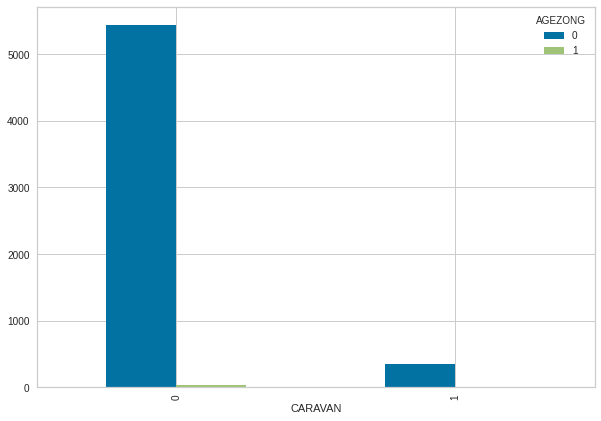

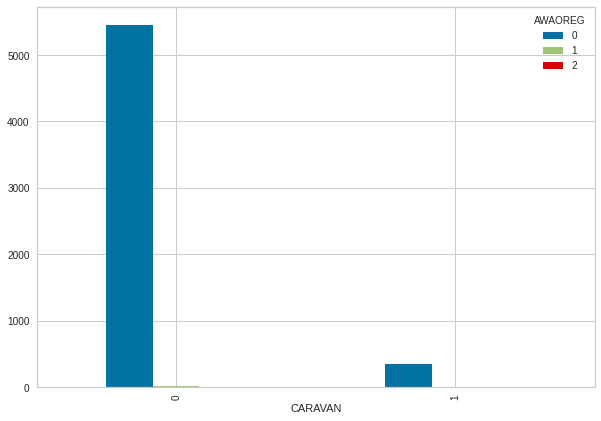

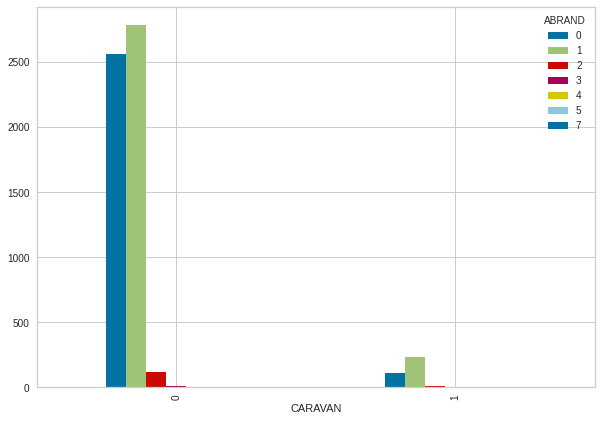

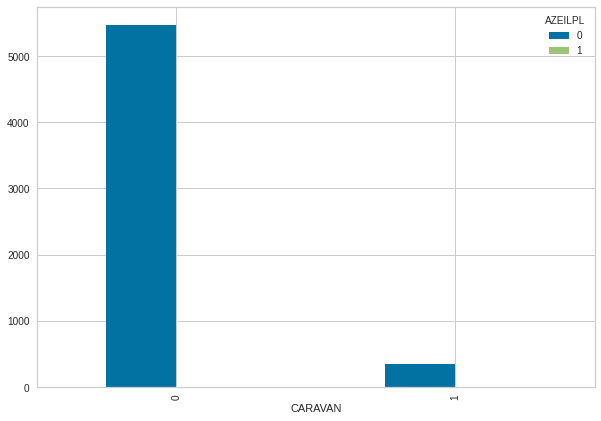

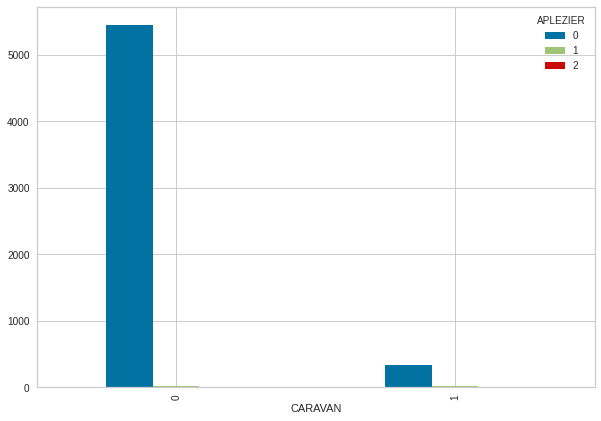

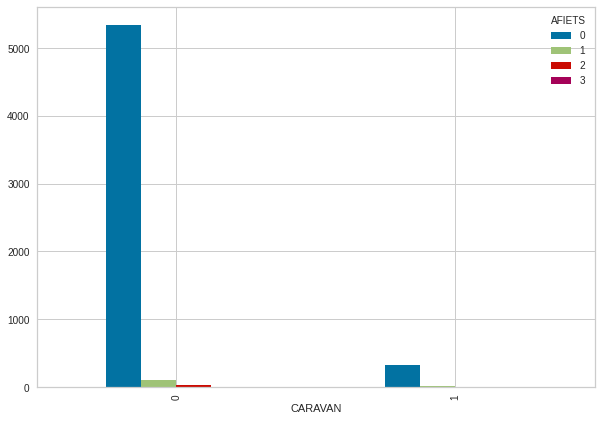

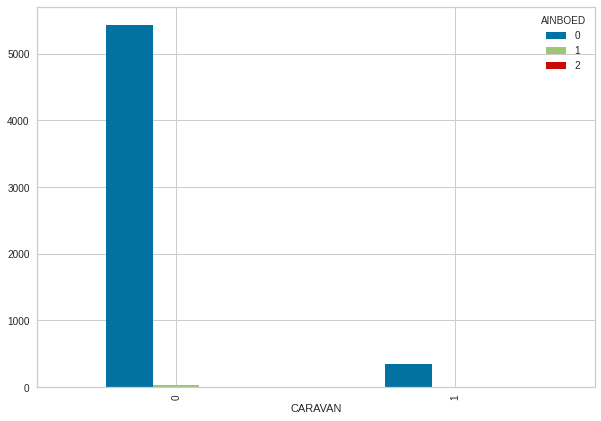

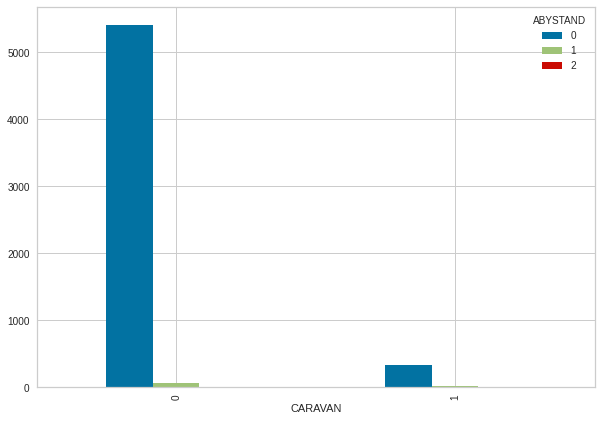

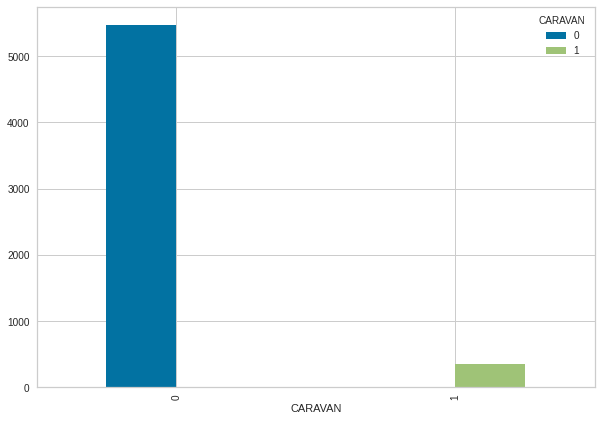

In [5]:
for x in list(base.columns):
  data = base.groupby(['CARAVAN',x])['CARAVAN'].count()
  data = data.unstack().fillna(0)
  data.plot(kind='bar',
    figsize=(10, 7))
  plt.show()
  

In [6]:
grafico = px.treemap(base, path=['MOSTYPE'])
grafico

In [7]:
grafico = px.treemap(base, path=['MGEMOMV'])
grafico

In [8]:
grafico = px.treemap(base, path=['MGEMLEEF'])
grafico

In [9]:
grafico = px.treemap(base, path=['MOSHOOFD'])
grafico

Com essa analise foi possivel perceber que maior parte das pessoas contidas nesse dados sao pessaos de classe baixa e de renda baixa tambem, apesar de boa parte delas nao ter apolice ainda sim e constituem uma grande parte das pessaos que tambem tem apolice, outro fato interesante e quem maior parte das pessaos dentro desse dataset possui mais de uma casa o que da a entender que e um publico familiar com mais de 2 integrantes, outro ponto a se notar e a idade media de cada um desses grupos que estaem media de 40 a 50 anos sendo assim um grupo familiar mais maduro provavelmente procurando um lugar para passar um fim de semana ou ate mesmo um periodo fora, a informacao anterior tem ainda mais forca quando analisamos o principal tipo de comprador.

Tratamento de dados

In [10]:
x_base = base.iloc[:,0:85]
y_base = base.iloc[:,85]

Aqui foi separado x_base para as variaveis depedentes e y_base para o atributo previsor

Crossvalidation - Test Train split

In [11]:
from sklearn.model_selection import train_test_split
x_base_train, x_base_test,y_base_train,y_base_test = train_test_split(x_base,y_base,test_size = 0.15, random_state = 0)

In [12]:
x_base_train.shape,y_base_train.shape

((4948, 85), (4948,))

In [13]:
x_base_test.shape,y_base_test.shape

((874, 85), (874,))

In [14]:
y_base_train.head()

4899    0
575     0
2379    0
4       0
4304    0
Name: CARAVAN, dtype: int64

Arvore de descisao

In [15]:
from sklearn.tree import DecisionTreeClassifier
arvore_base = DecisionTreeClassifier(criterion='entropy',random_state=0)
arvore_base.fit(x_base_train,y_base_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [16]:
previsoes = arvore_base.predict(x_base_test)

In [17]:
y_base_test

840     0
3338    0
2976    0
5114    0
527     0
       ..
5242    0
487     0
3000    0
483     0
4751    0
Name: CARAVAN, Length: 874, dtype: int64

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



0.8832951945080092

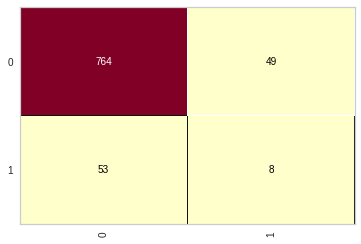

In [18]:
cm = ConfusionMatrix(arvore_base)
cm.fit(x_base_train,y_base_train)
cm.score(x_base_test,y_base_test)

In [19]:
print(classification_report(y_base_test,previsoes))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       813
           1       0.14      0.13      0.14        61

    accuracy                           0.88       874
   macro avg       0.54      0.54      0.54       874
weighted avg       0.88      0.88      0.88       874



In [20]:
conf_mat = confusion_matrix(y_base_train, arvore_base.predict(x_base_train))
print('Specificity', conf_mat[1, 1] / sum(conf_mat[1, :]))

Specificity 0.8954703832752613


In [21]:
def plot_roc_curve(y_true, y_score, figsize=(10,6)):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    plt.figure(figsize=figsize)
    auc_value = roc_auc_score(y_true, y_score)
    plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.2f)' % auc_value)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='dotted')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('(ROC) Curve')
    plt.legend()
    plt.show()

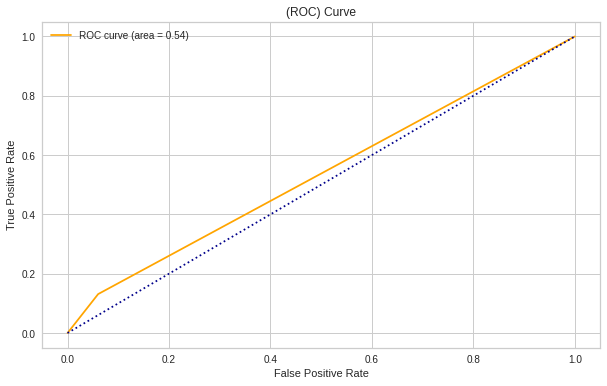

In [22]:
plot_roc_curve(y_base_test,previsoes)

Arvore de decisao - dados de validacao

In [44]:
arvore_base_validacao = DecisionTreeClassifier(criterion='entropy',random_state=0)
arvore_base_validacao.fit(x_base_train,y_base_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [49]:
previsoes_validation = arvore_base_validacao.predict(base_validation)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



0.889

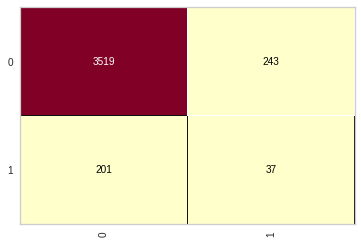

In [47]:
cm = ConfusionMatrix(arvore_base_validacao)
cm.fit(base_validation,tgs_validation)
cm.score(base_validation,tgs_validation)

In [50]:
print(classification_report(tgs_validation,previsoes_validation))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      3762
           1       0.13      0.16      0.14       238

    accuracy                           0.89      4000
   macro avg       0.54      0.55      0.54      4000
weighted avg       0.90      0.89      0.89      4000



In [51]:
conf_mat = confusion_matrix(tgs_validation, arvore_base_validacao.predict(base_validation))
print('Specificity', conf_mat[1, 1] / sum(conf_mat[1, :]))

Specificity 0.15546218487394958


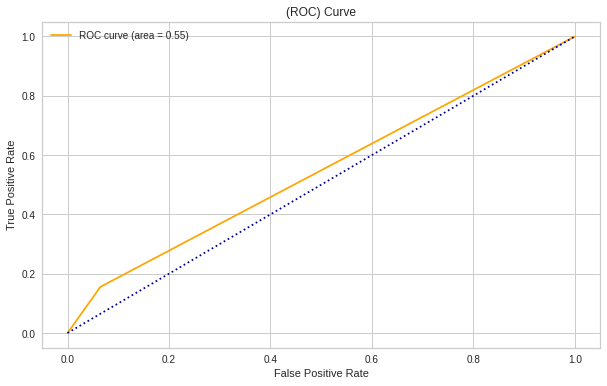

In [52]:
plot_roc_curve(tgs_validation,previsoes_validation)

Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

random_forest_base = RandomForestClassifier(n_estimators=150,criterion='entropy',random_state = 0)
random_forest_base.fit(x_base_train,y_base_train)

RandomForestClassifier(criterion='entropy', n_estimators=150, random_state=0)

In [24]:
previsoes_forest = random_forest_base.predict(x_base_test)

In [25]:
accuracy_score(y_base_test,previsoes_forest)

0.9176201372997712

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



0.9176201372997712

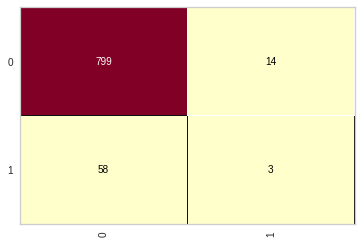

In [26]:
cm = ConfusionMatrix(random_forest_base)
cm.fit(x_base_train,y_base_train)
cm.score(x_base_test,y_base_test)

In [27]:
print(classification_report(y_base_test,previsoes_forest))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       813
           1       0.18      0.05      0.08        61

    accuracy                           0.92       874
   macro avg       0.55      0.52      0.52       874
weighted avg       0.88      0.92      0.90       874



In [28]:
conf_mat = confusion_matrix(y_base_train, random_forest_base.predict(x_base_train))
print('Specificity', conf_mat[1, 1] / sum(conf_mat[1, :]))

Specificity 0.9059233449477352


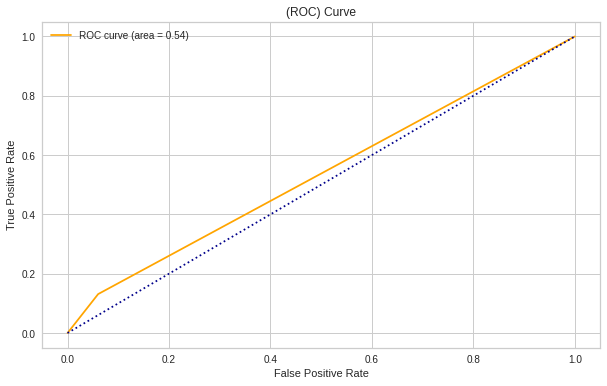

In [29]:
plot_roc_curve(y_base_test,previsoes)

Random Forest - Validacao

In [59]:
random_forest_validation = RandomForestClassifier(n_estimators=150,criterion='entropy',random_state = 0)
random_forest_validation.fit(x_base_train,y_base_train)

RandomForestClassifier(criterion='entropy', n_estimators=150, random_state=0)

In [60]:
previsoes_forest_validation = random_forest_validation.predict(base_validation)

In [61]:
accuracy_score(tgs_validation,previsoes_forest_validation)

0.9315

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



0.9315

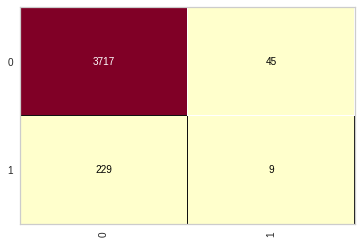

In [62]:
cm = ConfusionMatrix(random_forest_validation)
cm.fit(base_validation,tgs_validation)
cm.score(base_validation,tgs_validation)

In [63]:
print(classification_report(tgs_validation,previsoes_forest_validation))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      3762
           1       0.17      0.04      0.06       238

    accuracy                           0.93      4000
   macro avg       0.55      0.51      0.51      4000
weighted avg       0.90      0.93      0.91      4000



In [66]:
conf_mat = confusion_matrix(tgs_validation, random_forest_validation.predict(base_validation))
print('Specificity', conf_mat[1, 1] / sum(conf_mat[1, :]))

Specificity 0.037815126050420166


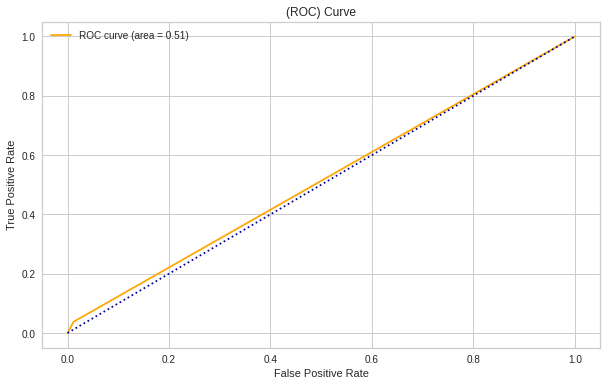

In [67]:
plot_roc_curve(tgs_validation,previsoes_forest_validation)

KNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn_base = KNeighborsClassifier(n_neighbors=5)
knn_base.fit(x_base_train,y_base_train)

KNeighborsClassifier()

In [31]:
previsoes_knn = knn_base.predict(x_base_test)

In [32]:
accuracy_score(y_base_test,previsoes_knn)

0.9244851258581236

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



0.9244851258581236

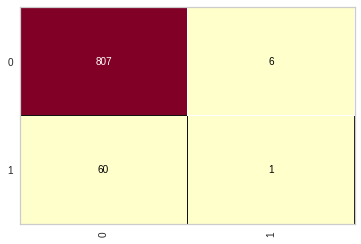

In [33]:
cm = ConfusionMatrix(knn_base)
cm.fit(x_base_train,y_base_train)
cm.score(x_base_test,y_base_test)

In [34]:
print(classification_report(y_base_test,previsoes_knn))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       813
           1       0.14      0.02      0.03        61

    accuracy                           0.92       874
   macro avg       0.54      0.50      0.50       874
weighted avg       0.88      0.92      0.90       874



In [35]:
conf_mat = confusion_matrix(y_base_train, knn_base.predict(x_base_train))
print('Specificity', conf_mat[1, 1] / sum(conf_mat[1, :]))

Specificity 0.06620209059233449


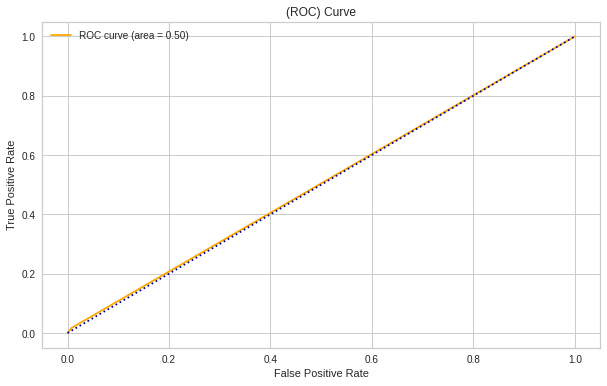

In [36]:
plot_roc_curve(y_base_test,previsoes_knn)

KNN - validacao

In [69]:
knn_validacao = KNeighborsClassifier(n_neighbors=5)
knn_validacao.fit(x_base_train,y_base_train)

KNeighborsClassifier()

In [70]:
previsoes_knn_validacao = knn_base.predict(base_validation)

In [71]:
accuracy_score(tgs_validation,previsoes_knn_validacao)

0.93725

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



0.93725

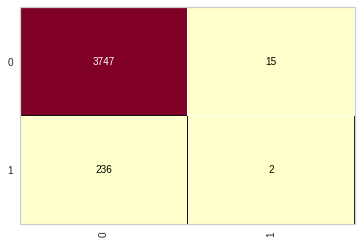

In [72]:
cm = ConfusionMatrix(knn_validacao)
cm.fit(base_validation,tgs_validation)
cm.score(base_validation,tgs_validation)

In [73]:
print(classification_report(tgs_validation,previsoes_knn_validacao))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3762
           1       0.12      0.01      0.02       238

    accuracy                           0.94      4000
   macro avg       0.53      0.50      0.49      4000
weighted avg       0.89      0.94      0.91      4000



In [74]:
conf_mat = confusion_matrix(tgs_validation, knn_validacao.predict(base_validation))
print('Specificity', conf_mat[1, 1] / sum(conf_mat[1, :]))

Specificity 0.008403361344537815


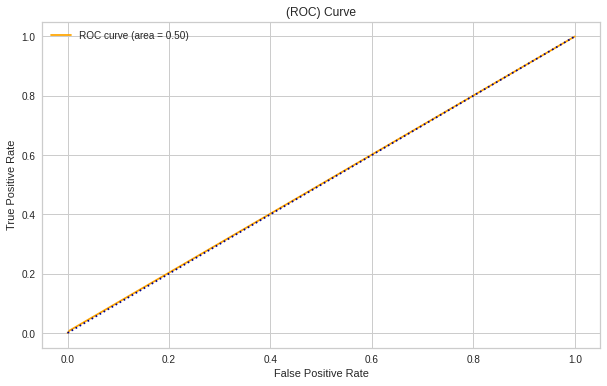

In [75]:
plot_roc_curve(tgs_validation,previsoes_knn_validacao)

Referencias
https://realpython.com/pandas-groupby/, 
https://www.geeksforgeeks.org/create-a-grouped-bar-plot-in-matplotlib/, https://www.kaggle.com/code/sreshta140/simple-analysis-on-tic, https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python